In [ ]:
# Observations
  #  1. Tumor volumme decreased over time for mouse b128,with the Capomulin treatment.
#    2. After calculating the correlation between the mices weight and tumorvolume for the Capomulin, I've determined that there is a positive, strong, correlation between the two. The correlation between mouse weight and avg tumor volume is 0.84.

  #  3. Most of the mice were treated with Ramicane and Capomulin.

In [2038]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()
## mouse_metadata.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2039]:
study_results = pd.read_csv(study_results_path)
study_results.head()
## study_results.shape

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2040]:
# Combine the data into a single dataset 
# I want to know which column is the unique identifier to complete the merge on
## mouse_metadata.columns
## study_results.columns
## mouse_metadata.shape
## study_results.shape
mouse_studydf = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
mouse_studydf.head()
## mouse_studydf.columns
## mouse_studydf.shape
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2041]:
# Checking the number of mice.
pd.value_counts(mouse_studydf["Mouse ID"])


g989    13
g296    10
a251    10
c757    10
e662    10
        ..
b447     1
x336     1
x226     1
l872     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [2042]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##mouse_studydf.drop_duplicates(subset=['Mouse ID', 'Timepoint']).shape
sho_dupdf = pd.DataFrame(mouse_studydf, columns=['Mouse ID', 'Timepoint'])
disp_dup_colum = sho_dup[sho_dup.duplicated()]
disp_dup_colum

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [2043]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_studydf = mouse_studydf.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_studydf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2044]:
# Checking the number of mice in the clean DataFrame.
pd.value_counts(clean_mouse_studydf['Mouse ID'])

g296    10
z578    10
c757    10
e662    10
i901    10
        ..
b447     1
x336     1
x226     1
l872     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [2045]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_stats_m_s = clean_mouse_studydf.groupby(['Drug Regimen'])
MTV = grouped_stats_m_s['Tumor Volume (mm3)'].mean()
MDTV = grouped_stats_m_s['Tumor Volume (mm3)'].median()
VTV = grouped_stats_m_s['Tumor Volume (mm3)'].var()
STDTV = grouped_stats_m_s['Tumor Volume (mm3)'].std()
SEMTV = grouped_stats_m_s['Tumor Volume (mm3)'].sem()
S_df = pd.DataFrame({"T Vol Mean": MTV,"T Vol Meadian": MDTV, "T Vol Var": VTV, "T Vol Std": STDTV,"T Vol SEM": SEMTV})
S_df


,T Vol Mean,T Vol Meadian,T Vol Var,T Vol Std,T Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

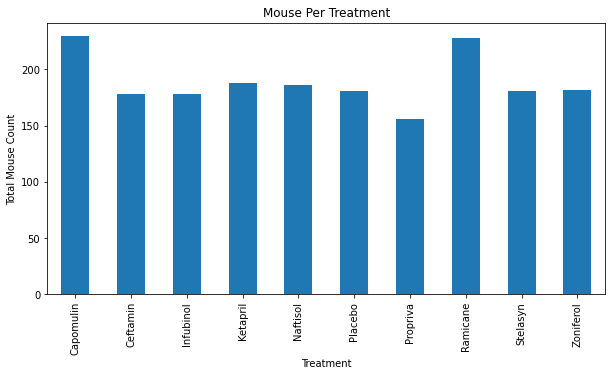

In [2046]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Mouse_Count = grouped_stats_m_s['Mouse ID'].count()
df = pd.DataFrame(Mouse_Count)
Mouse_Count.plot(kind="bar", figsize=(10,5))
plt.title("Mouse Per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Total Mouse Count")
plt.show()

In [2047]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

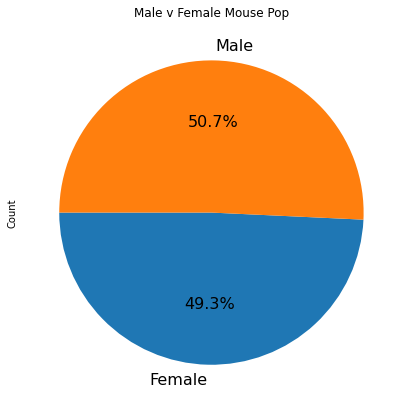

In [2048]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_df = pd.DataFrame(clean_mouse_studydf.groupby(["Sex"]).count()).reset_index()
Gender_df = Gender_df[["Sex", "Mouse ID"]]
Gender_dfr = Gender_df.rename(columns={"Mouse ID":"Count"})

plt.figure(figsize=(15,8))
ax1 = plt.subplot(121, aspect='equal')
Gender_dfr.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=Gender_dfr['Sex'], legend = False, fontsize=16) 
plt.title( 'Male v Female Mouse Pop')
plt.show()

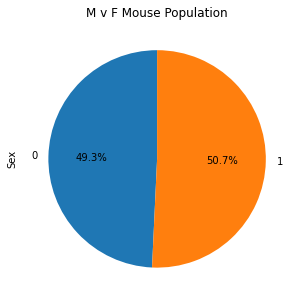

In [2049]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = Gender_df["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=90)
plt.title('M v F Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [2050]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mouse_studydf.loc[clean_mouse_studydf["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_studydf.loc[clean_mouse_studydf["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_studydf.loc[clean_mouse_studydf["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mouse_studydf.loc[clean_mouse_studydf["Drug Regimen"] == "Ceftamin", :]
##al4_df = clean_mouse_studydf.set_index("Drug Regimen")
##al4_df_final = al4_df.loc[["Capomulin","Ramicane", "Infubinol", "Ceftamin"]]

# Start by getting the last (greatest) timepoint for each mouse
sort_great = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
sort_great_df = pd.DataFrame(sort_great)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sort_great_df_fn = pd.merge(sort_great_df, clean_mouse_studydf, on=("Mouse ID","Timepoint"),how="left")
sort_great_df_fn



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [2051]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
CA_TM_V = sort_great_df_fn["Tumor Volume (mm3)"]

Capomulin_Q = CA_TM_V.quantile([.25,.5,.75])
ca_low = Capomulin_Q[.25]
ca_upp = Capomulin_Q[.75]
IQR = ca_upp-ca_low


l_bound = ca_low - (1.5*IQR)
u_bound = ca_upp + (1.5*IQR)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
print(f"Capomulin outliers values are below {l_bound} and above {u_bound}.")
    

Capomulin outliers values are below 20.70456164999999 and above 51.83201549.


In [2052]:
# Start by getting the last (greatest) timepoint for each mouse
RAMsort_great = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
RAMsort_great_df = pd.DataFrame(RAMsort_great)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
RAMsort_great_df_fn = pd.merge(RAMsort_great_df, clean_mouse_studydf, on=("Mouse ID","Timepoint"),how="left")
RAMsort_great_df_fn

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [2053]:
RA_TM_V = RAMsort_great_df_fn["Tumor Volume (mm3)"]

Ramicane_Q = RA_TM_V.quantile([.25,.5,.75])
ra_low = Ramicane_Q[.25]
ra_upp = Ramicane_Q[.75]
RAIQR = ra_upp-ra_low
RAIQR


l_bound_ra = ra_low - (1.5*RAIQR)
u_bound_ra = ra_upp + (1.5*RAIQR)

print(f"Ramicane outliers values are below {l_bound_ra} and above {u_bound_ra}.")


Ramicane outliers values are below 17.912664470000003 and above 54.30681135.


In [2054]:
# Start by getting the last (greatest) timepoint for each mouse
INFsort_great = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
INFsort_great_df = pd.DataFrame(INFsort_great)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
INFsort_great_df_fn = pd.merge(INFsort_great_df, clean_mouse_studydf, on=("Mouse ID","Timepoint"),how="left")
INFsort_great_df_fn

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [2055]:
IN_TM_V = INFsort_great_df_fn["Tumor Volume (mm3)"]

Infubinol_Q = IN_TM_V.quantile([.25,.5,.75])
in_low = Infubinol_Q[.25]
in_upp = Infubinol_Q[.75]
IQR_IN = in_upp-in_low


l_bound_IN = in_low - (1.5*IQR_IN)
u_bound_IN = in_upp + (1.5*IQR_IN)
print(f"Infubinol outliers values are below {l_bound_IN} and above {u_bound_IN}.")

Infubinol outliers values are below 36.83290494999999 and above 82.74144559000001.


In [2056]:
# Start by getting the last (greatest) timepoint for each mouse
CEFsort_great = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
CEFsort_great_df = pd.DataFrame(CEFsort_great)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
CEFsort_great_df_fn = pd.merge(CEFsort_great_df, clean_mouse_studydf, on=("Mouse ID","Timepoint"),how="left")
CEFsort_great_df_fn

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [2057]:
CE_TM_V = CEFsort_great_df_fn["Tumor Volume (mm3)"]

Ceftamin_Q = CE_TM_V.quantile([.25,.5,.75])
ce_low = Ceftamin_Q[.25]
ce_upp = Ceftamin_Q[.75]
CE_IQR = ce_upp-ce_low


l_bound_CE = ce_low - (1.5*CE_IQR)
u_bound_CE = ce_upp + (1.5*CE_IQR) 
print(f"Ceftamin outliers values are below {l_bound_CE} and above {u_bound_CE}.")

Ceftamin outliers values are below 25.355449580000002 and above 87.66645829999999.


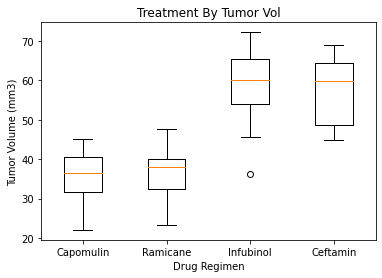

In [2058]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_data = [RA_TM_V, CA_TM_V, IN_TM_V, CE_TM_V]

fig1, ax1 = plt.subplots()
ax1.set_title('Treatment By Tumor Vol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(Tumor_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

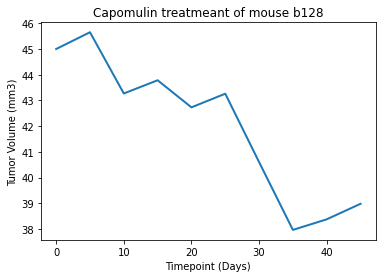

In [2059]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
Line_df.head()

x_axis_TimeP = Line_df["Timepoint"]
TVol = Line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis_TimeP, TVol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

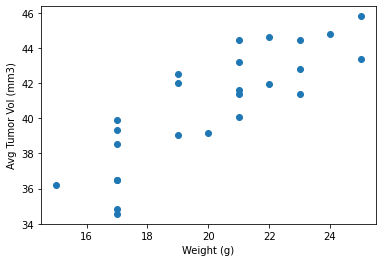

In [2060]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tv_MC = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tv_MC['Weight (g)'],avg_tv_MC['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')

plt.show()

## Correlation and Regression

In [2061]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_tv_MC['Weight (g)'],avg_tv_MC['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and avg tumor volume is {correlation}")

The correlation between mouse weight and avg tumor volume is 0.84


In [2062]:
LRMod = st.linregress(avg_tv_MC['Weight (g)'],avg_tv_MC['Tumor Volume (mm3)'])
LRMod

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

In [2063]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

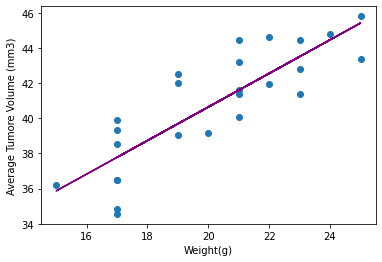

In [2064]:
y_values = avg_tv_MC['Weight (g)']*mslope+bintercept
plt.scatter(avg_tv_MC['Weight (g)'],avg_tv_MC['Tumor Volume (mm3)'])
plt.plot(avg_tv_MC['Weight (g)'],y_values,color="purple")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()